## Problem statement: Build a Linear Regression model to predict Car's MPG based on other parameters

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# import requests
import pandas as pd
from io import StringIO

url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'
r = requests.get(url)

file = r.text.replace("\t"," ")

# list_labels written manually:
list_labels = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model year', 'origin','car name']

df = pd.read_csv(StringIO(file),sep="\s+",header = None,names=list_labels)

with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(df)

## Exploratory Data Analysis

In [4]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    float64
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [6]:
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

In [7]:
df.shape

(398, 9)

In [8]:
df.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight          float64
acceleration    float64
model year        int64
origin            int64
car name         object
dtype: object

In [9]:
df.horsepower.unique()

array(['130.0', '165.0', '150.0', '140.0', '198.0', '220.0', '215.0',
       '225.0', '190.0', '170.0', '160.0', '95.00', '97.00', '85.00',
       '88.00', '46.00', '87.00', '90.00', '113.0', '200.0', '210.0',
       '193.0', '?', '100.0', '105.0', '175.0', '153.0', '180.0', '110.0',
       '72.00', '86.00', '70.00', '76.00', '65.00', '69.00', '60.00',
       '80.00', '54.00', '208.0', '155.0', '112.0', '92.00', '145.0',
       '137.0', '158.0', '167.0', '94.00', '107.0', '230.0', '49.00',
       '75.00', '91.00', '122.0', '67.00', '83.00', '78.00', '52.00',
       '61.00', '93.00', '148.0', '129.0', '96.00', '71.00', '98.00',
       '115.0', '53.00', '81.00', '79.00', '120.0', '152.0', '102.0',
       '108.0', '68.00', '58.00', '149.0', '89.00', '63.00', '48.00',
       '66.00', '139.0', '103.0', '125.0', '133.0', '138.0', '135.0',
       '142.0', '77.00', '62.00', '132.0', '84.00', '64.00', '74.00',
       '116.0', '82.00'], dtype=object)

In [10]:
df = df[df.horsepower!= '?']

In [11]:
print('?' in df.horsepower)

False


In [12]:
df['model year'].unique()

array([70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82], dtype=int64)

In [13]:
df.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight          float64
acceleration    float64
model year        int64
origin            int64
car name         object
dtype: object

In [14]:
df.horsepower = df.horsepower.astype('float')

In [15]:
df.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower      float64
weight          float64
acceleration    float64
model year        int64
origin            int64
car name         object
dtype: object

In [16]:
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592,1.576531
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737,0.805518
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000,1.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


C:\Users\sande\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='mpg', ylabel='Density'>

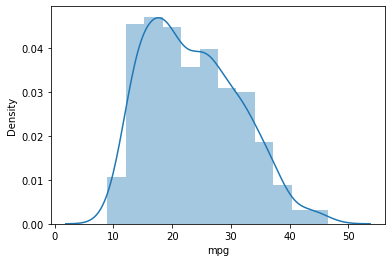

In [17]:
sns.distplot(df['mpg'])

<AxesSubplot:xlabel='horsepower', ylabel='Count'>

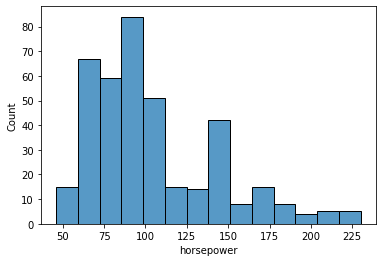

In [18]:
sns.histplot(df['horsepower'])

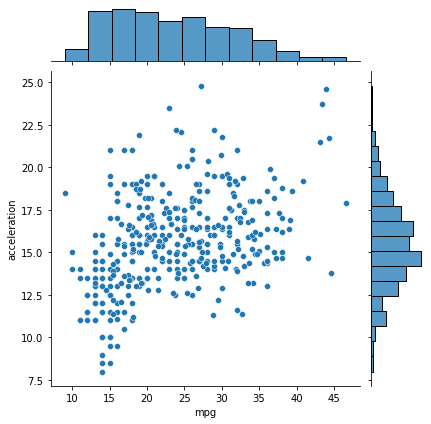

In [19]:
sns.jointplot(x='mpg',y='acceleration',data=df)

<AxesSubplot:xlabel='model year', ylabel='horsepower'>

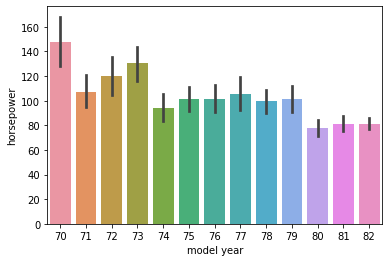

In [20]:
sns.barplot(x='model year',y='horsepower',data=df)

<AxesSubplot:xlabel='model year', ylabel='mpg'>

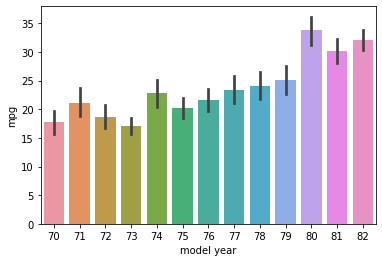

In [21]:
sns.barplot(x='model year',y='mpg',data=df)

<AxesSubplot:xlabel='origin', ylabel='count'>

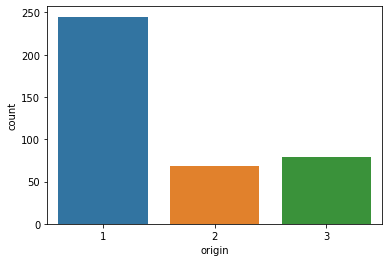

In [22]:
sns.countplot(x='origin',data=df)

<AxesSubplot:xlabel='origin', ylabel='mpg'>

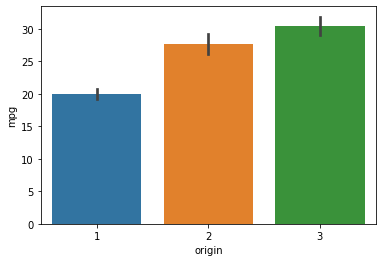

In [23]:
sns.barplot(x='origin',y='mpg',data=df)

<AxesSubplot:xlabel='cylinders', ylabel='count'>

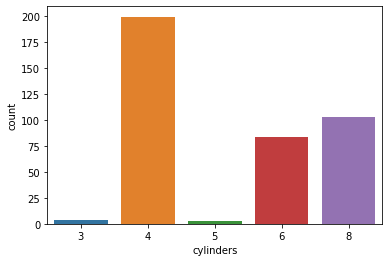

In [24]:
sns.countplot(x='cylinders',data=df)

<AxesSubplot:xlabel='acceleration', ylabel='count'>

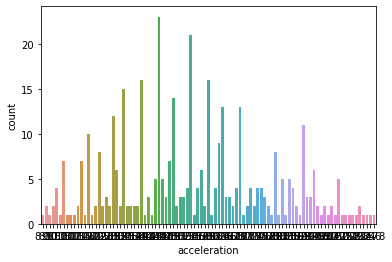

In [25]:
sns.countplot(x='acceleration',data=df)

In [27]:
df['origin'].unique()

array([1, 3, 2], dtype=int64)

In [28]:
df[df['origin']==1]['car name']

0      chevrolet chevelle malibu
1              buick skylark 320
2             plymouth satellite
3                  amc rebel sst
4                    ford torino
                 ...            
392             chevrolet camaro
393              ford mustang gl
395                dodge rampage
396                  ford ranger
397                   chevy s-10
Name: car name, Length: 245, dtype: object

In [29]:
df[df['origin']==2]['car name']

19     volkswagen 1131 deluxe sedan
20                      peugeot 504
21                      audi 100 ls
22                         saab 99e
23                         bmw 2002
                   ...             
353                volkswagen jetta
359       peugeot 505s turbo diesel
360                    volvo diesel
375             volkswagen rabbit l
394                       vw pickup
Name: car name, Length: 68, dtype: object

In [30]:
df[df['origin']==3]['car name']

14     toyota corona mark ii
18              datsun pl510
29              datsun pl510
31             toyota corona
53       toyota corolla 1200
               ...          
382           toyota corolla
383              honda civic
384       honda civic (auto)
385            datsun 310 gx
390         toyota celica gt
Name: car name, Length: 79, dtype: object

In [36]:
df['origin'][df.origin == 1] = "USA"
df['origin'][df.origin == 2] = "Europe"
df['origin'][df.origin == 3] = "Asia"

<ipython-input-36-7b254ae671f4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['origin'][df.origin == 1] = "USA"


In [37]:
df['origin'].unique()

array(['USA', 'Asia', 'Europe'], dtype=object)

In [38]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504.0,12.0,70,USA,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,USA,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,USA,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,USA,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,USA,ford torino


In [40]:
df_new = pd.get_dummies(df, columns = ['origin'])

In [41]:
df_new.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,car name,origin_Asia,origin_Europe,origin_USA
0,18.0,8,307.0,130.0,3504.0,12.0,70,chevrolet chevelle malibu,0,0,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,buick skylark 320,0,0,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,plymouth satellite,0,0,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,amc rebel sst,0,0,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,ford torino,0,0,1


In [42]:
df_new = df_new.drop('car name',axis=1)

In [43]:
df_new

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin_Asia,origin_Europe,origin_USA
0,18.0,8,307.0,130.0,3504.0,12.0,70,0,0,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,0,0,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,0,0,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,0,0,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,0,0,1
...,...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790.0,15.6,82,0,0,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,0,1,0
395,32.0,4,135.0,84.0,2295.0,11.6,82,0,0,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,0,0,1


In [56]:
X = df_new.iloc[:,1:]

In [57]:
X

,cylinders,displacement,horsepower,weight,acceleration,model year,origin_Asia,origin_Europe,origin_USA
0,8,307.0,130.0,3504.0,12.0,70,0,0,1
1,8,350.0,165.0,3693.0,11.5,70,0,0,1
2,8,318.0,150.0,3436.0,11.0,70,0,0,1
3,8,304.0,150.0,3433.0,12.0,70,0,0,1
4,8,302.0,140.0,3449.0,10.5,70,0,0,1
...,...,...,...,...,...,...,...,...,...
393,4,140.0,86.0,2790.0,15.6,82,0,0,1
394,4,97.0,52.0,2130.0,24.6,82,0,1,0
395,4,135.0,84.0,2295.0,11.6,82,0,0,1
396,4,120.0,79.0,2625.0,18.6,82,0,0,1


In [58]:
y = df_new['mpg']

In [59]:
y

0      18.0
1      15.0
2      18.0
3      16.0
4      17.0
       ... 
393    27.0
394    44.0
395    32.0
396    28.0
397    31.0
Name: mpg, Length: 392, dtype: float64

## Test- Train Split

In [60]:
from sklearn.model_selection import train_test_split

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

## Model Building

In [62]:
from sklearn.linear_model import LinearRegression

In [63]:
model = LinearRegression()

In [64]:
model.fit(X_train,y_train)

LinearRegression()

In [66]:
model.coef_

array([-0.39190194,  0.02302692, -0.03129105, -0.00632835,  0.07647194,
        0.7625928 ,  1.20268993,  1.11594167, -2.31863161])

In [67]:
predictions = model.predict(X_test)

C:\Users\sande\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='mpg'>

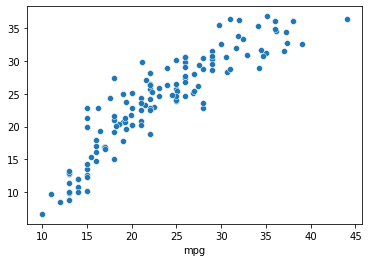

In [68]:
sns.scatterplot(y_test,predictions)

## Model Evaluation

In [71]:
from sklearn import metrics
print('MAE:',metrics.mean_absolute_error(y_test,predictions))
print('MSE:',metrics.mean_squared_error(y_test,predictions))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,predictions)))

MAE: 2.583726968955638
MSE: 10.747668299625321
RMSE: 3.278363661893738


In [72]:
metrics.explained_variance_score(y_test,predictions)

0.8045920895165235

C:\Users\sande\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='mpg', ylabel='Density'>

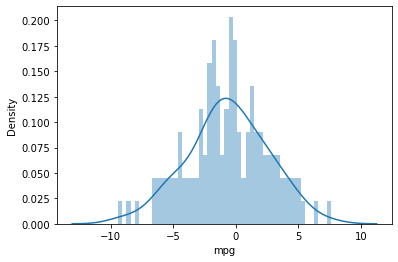

In [73]:
sns.distplot(y_test-predictions,bins=50)